<a href="https://colab.research.google.com/github/wabinyai/Forecast-/blob/main/OVACADO_DATASET_Facebook%E2%80%99s_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install the fbprophet Python library.**

In [1]:
pip install fbprophet

**Import required libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [5]:
from google.colab import files

In [20]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [18,8]

**Load the avocado dataset.**

In [6]:
uploaded = files.upload()
for fn in uploaded.keys():
  print ('Avacado dataset'.format(
      name=fn, length=len(uploaded[fn])
  ))

Saving avocado.csv to avocado.csv
Avacado dataset


In [8]:
df = pd.read_csv(fn)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


**Get information about columns, number of entries, data types etc. of the data**set

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


**Sort the DataFrame in ascending order of recorded date and create a new DataFrame having sorted records.**

In [10]:
df1 = df.sort_values("Date")

**Display some initial records of the sorted data.**

In [11]:
df1.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


**Plot the recorded prices and observe the trend.**

First, get the minimum and maximum dates in the historical data.

In [13]:
df1['Date'].min()

'2015-01-04'

In [15]:
df1['Date'].max()

'2018-03-25'

These outputs show that we have records from January 2015 to March 2018

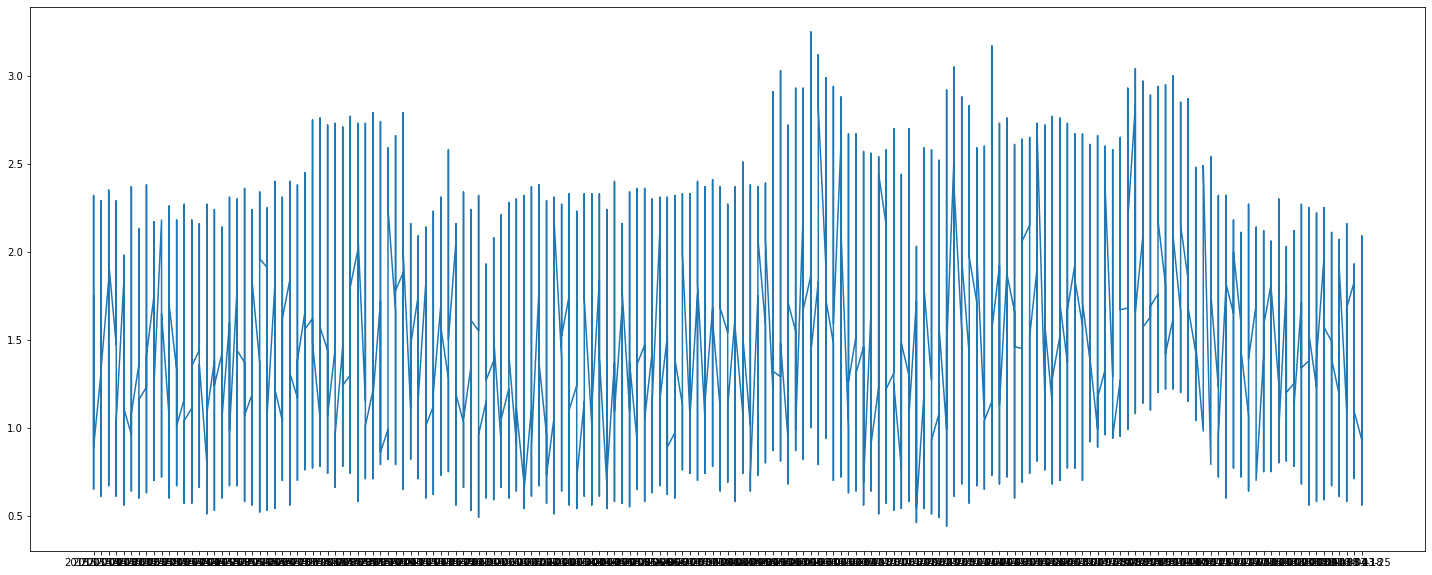

In [16]:
plt.figure(figsize=(25,10))
plt.plot(df1['Date'],df1['AveragePrice']) 

No handles with labels found to put in legend.


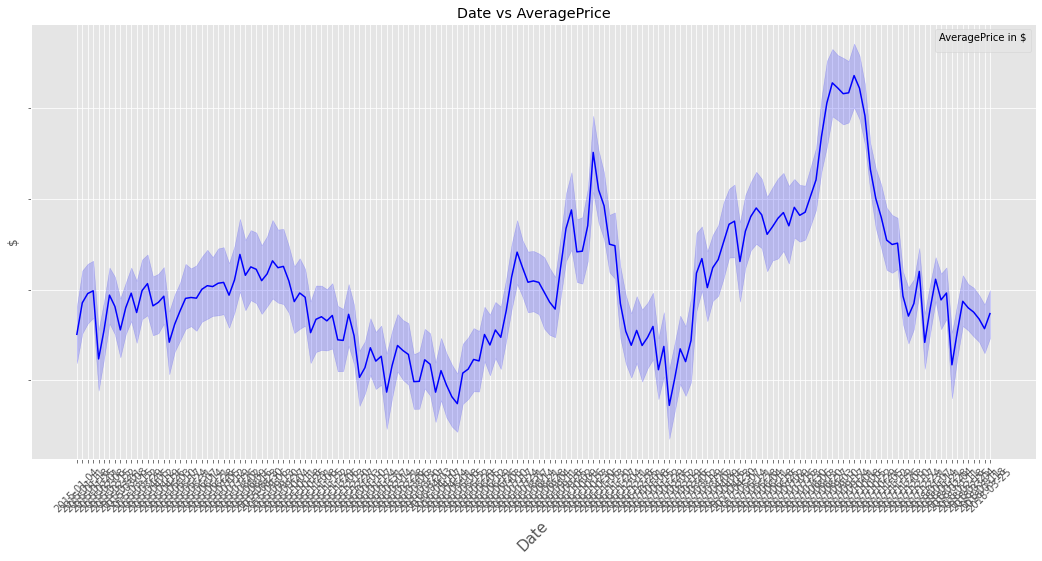

In [29]:
ax = sns.lineplot(x = df1['Date'],
                      y=df1['AveragePrice'],
                       data = df1,
                      color='blue',
                      linewidth=1.5,
                      
                      palette = "hls")

ax.set_yticklabels('$')
ax.set_xlabel('Date', fontsize = 15,rotation=45) 
ax.set_ylabel('$')
plt.title('Date vs AveragePrice')
ax.legend().set_title('AveragePrice in $')
plt.xticks(rotation=45)
plt.show()


**We can also observe region-wise distribution of the data.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

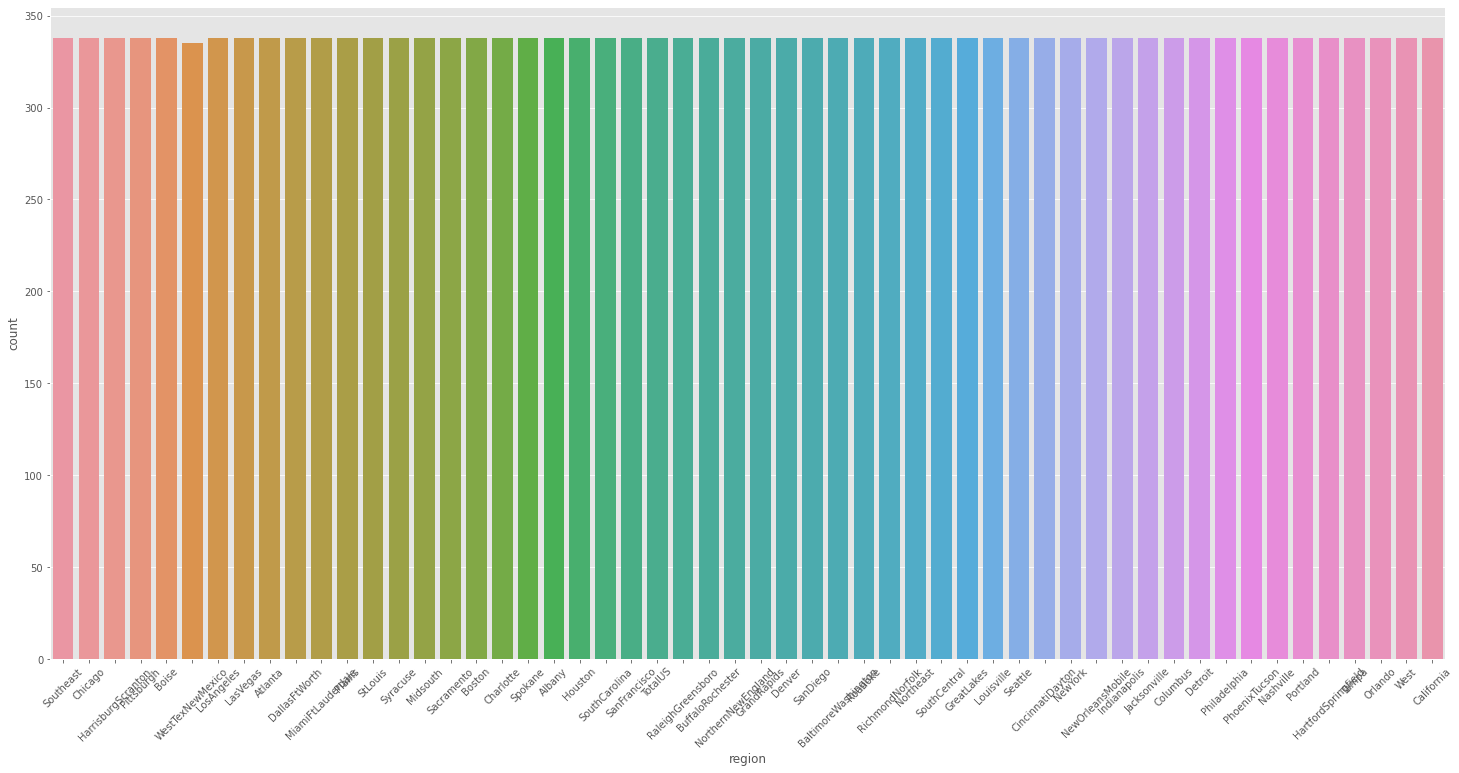

In [23]:
plt.figure(figsize=(25,12))
sns.countplot(x='region',data=df1)
plt.xticks(rotation=45) 

**Know the year-wise count of records in the data.**

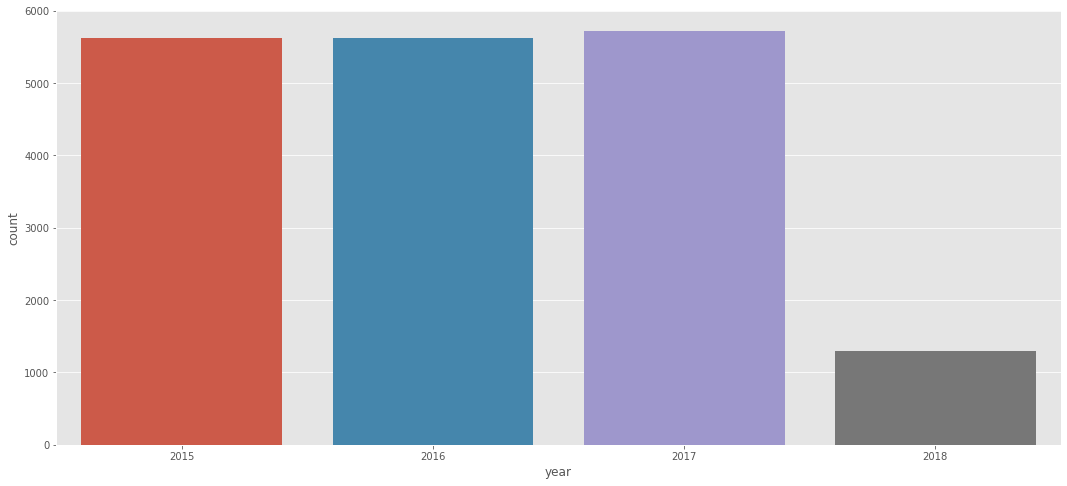

In [28]:
sns.countplot(x='year',data=df1)

# Forecasting Using Prophet


*   Prophet expects a DataFrame as input in which there are **two columns** 
*   specifically named as **‘ds’** and **‘y’**. 
*   ‘ds’ is the datestamp column while 
*   ‘y’ is the numeric variable for which forecast is to be made.

So we need to keep only the ‘Date’ and ‘AveragePrice’ columns of df1 DataFrame and rename them as ‘ds’ and ‘y’ respectively.

**Extract the two required columns**

In [30]:
df2 = df1[['Date','AveragePrice']]

In [31]:
df2.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


**Rename the columns**

In [32]:
df2.columns = ['ds','y']
 #Display initial columns to check if the columns have got renamed
df2.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


**Forecast the future prices using Prophet.**

Create a Prophet instance

In [33]:
m = Prophet()

In [34]:
m.fit(df2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Create a DataFrame with future dates for forecast.**

In [35]:
future = m.make_future_dataframe(periods=365)
#periods=365 specifies that forecast will be made for next 1 year

df2 has dates till 25/3/2018 so ‘future’ will be till 25/3/2019. 

Predict the prices for this new data having future dates as well

In [36]:
forecast = m.predict(future)

In [37]:
# Get information on the ‘forecast’ DataFrame created by Prophet.

forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          534 non-null    datetime64[ns]
 1   trend                       534 non-null    float64       
 2   yhat_lower                  534 non-null    float64       
 3   yhat_upper                  534 non-null    float64       
 4   trend_lower                 534 non-null    float64       
 5   trend_upper                 534 non-null    float64       
 6   additive_terms              534 non-null    float64       
 7   additive_terms_lower        534 non-null    float64       
 8   additive_terms_upper        534 non-null    float64       
 9   yearly                      534 non-null    float64       
 10  yearly_lower                534 non-null    float64       
 11  yearly_upper                534 non-null    float64       

In [38]:
# Display a few initial records of ‘forecast’.

forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498818,0.892036,1.890410,1.498818,1.498818,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,0.0,0.0,0.0,1.385214
1,2015-01-11,1.493637,0.937294,1.864016,1.493637,1.493637,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,0.0,0.0,0.0,1.388445
2,2015-01-18,1.488455,0.911987,1.896897,1.488455,1.488455,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,0.0,0.0,0.0,1.383592
3,2015-01-25,1.483273,0.882436,1.838460,1.483273,1.483273,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,0.0,0.0,0.0,1.359485
4,2015-02-01,1.478091,0.787827,1.833246,1.478091,1.478091,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,0.0,0.0,0.0,1.325978


** Plot the data with recorded as well as forecasted prices.  **   

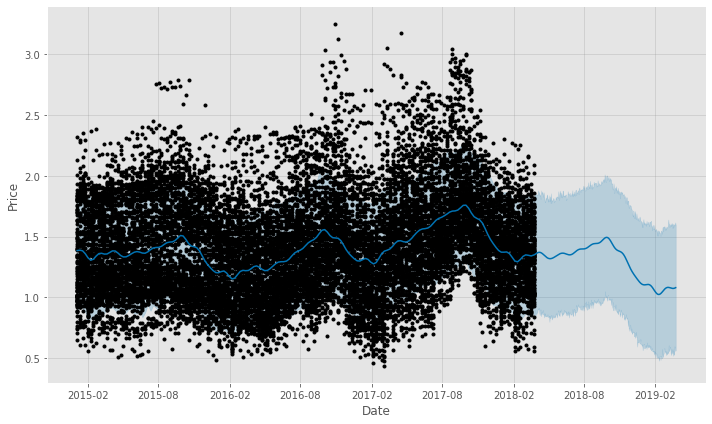

In [39]:
figure = m.plot(forecast,xlabel='Date',ylabel='Price')

*   Original data had monthly records till February 2019. The blue-shaded portion of the  above plot shows the prices predicted for the next one year’s span, i.e. till February 2019.

*   Actual recorded prices have been marked with black dots in the above plot, while the The blue non-linear line shows the average predicted prices

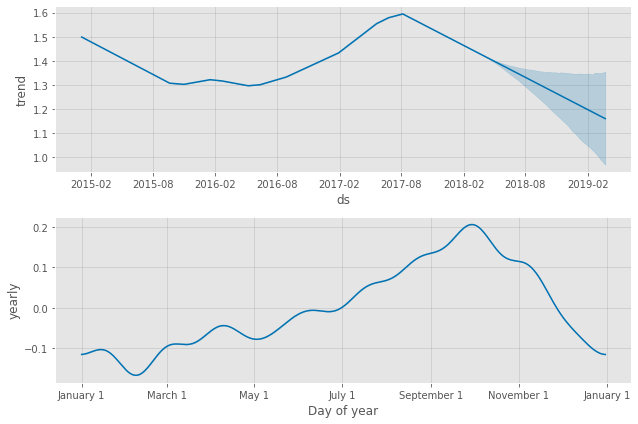

In [40]:
# Plot the components of the forecast.
figure = m.plot_components(forecast)

#Forecasting by REGION 

The above forecast is made for all regions in general. We can make forecast for a specific region as follows:
Extract data of the required region from the original data.

In [59]:
df3 = df[df['region']=='West']

In [42]:
# Sort the regional data in ascending order of dates.
df3 =  df3.sort_values('Date')

In [60]:
df3 =  df3.sort_values('Date')

**Plot the recorded prices for that specific region.**

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


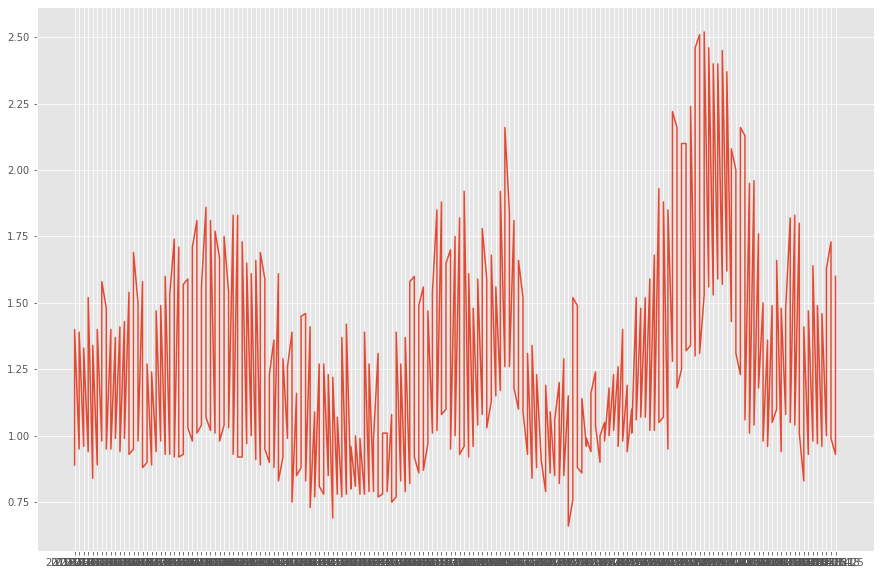

In [61]:


plt.figure(figsize=(15,10))
plt.plot(df3['Date'],df3['AveragePrice'])



In [64]:
# Extract the ‘Date’ and ‘AveragePrice’ column and rename them as ‘ds’ and ‘y’ respectively.
df3 = df3[['Date','AveragePrice']]
df3.columns = ['ds','y'] 

**Create Prophet instance and fit the data**

In [46]:
m = Prophet()
m.fit(df3) 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Forecast prices for the next one year for that specific region.**

In [75]:


future = m.make_future_dataframe(periods=365)
forecast = m.predict(future) 

**lot the recorded and forecasted prices for the region.**

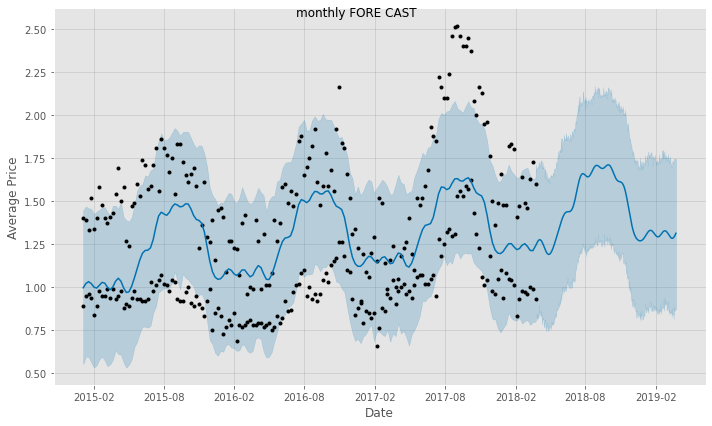

In [77]:
figure = m.plot(forecast,xlabel='Date',ylabel='Average Price')
plot = plt.suptitle('monthly FORE CAST')

(Black dots: actual price values, Blue curve: predicted prices)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


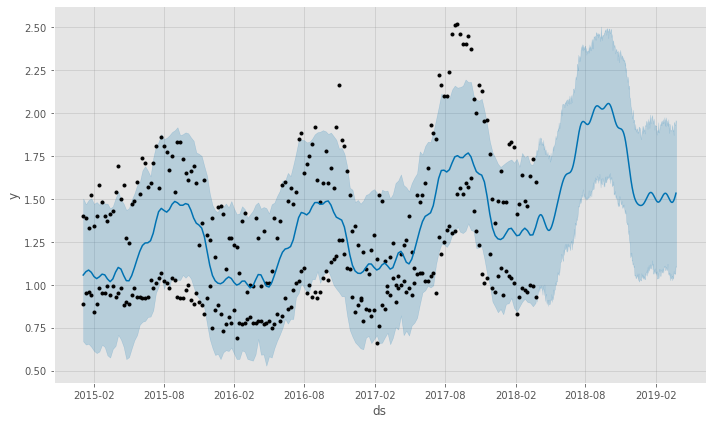

In [68]:
m = Prophet(seasonality_mode='multiplicative').fit(df3)
future = m.make_future_dataframe(periods=365)
fcst = m.predict(future)
fig = m.plot(fcst)